# importing libraries

In [ ]:
import torch
from torchvision import transforms
import torchvision.datasets as datasets
from torch import nn
from torch import optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

##Downloading the data

# PASCAL VOC 2007 Dataset

PASCAL VOC 2007 dataset consist of three parts- training (2501 images), validation (2510 images) and test (4952 images). Dataset consist of 20 classes. Each sample has one or more labels associated.  

In [ ]:
# Define transformations
transform = transforms.Compose([
                                    transforms.Resize((224, 224)),   # Resize images to the input size expected by ResNet
                                    transforms.ToTensor(),           # Convert images to PyTorch tensors
                                                                # list of mean, std values for each channel
                                    transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]),  # Normalize pixel values
                                ])

In [ ]:
# Load the VOC train dataset
voc_data_train = datasets.VOCDetection(root = 'content/voc', download = True, image_set = 'train', year = '2007', transform = transform)

100%|██████████| 460032000/460032000 [00:20<00:00, 21920548.19it/s]


Extracting content/voc/VOCtrainval_06-Nov-2007.tar to content/voc


In [ ]:
def plot_images(voc_data, number_of_images):

    for i in range(number_of_images):

        # Assuming voc_data_train[100][0] is a tensor
        image_tensor = voc_data_train[i][0]

        objects = voc_data_train[i][1]['annotation']['object']
        total_objects = len(objects)
        label = []
        for obj in range(total_objects):

            extract_name = voc_data_train[i][1]['annotation']['object'][obj]['name']
            label.append(extract_name)

        # Convert the tensor to a NumPy array and transpose the dimensions
        image_np = image_tensor.numpy().transpose((1, 2, 0))

        print('Label of the image is: ', label)
        # Display the image
        plt.imshow(image_np)
        plt.show()

        print('='*200)

In [ ]:
voc_data_train[100], voc_data_train[100][0].shape, len(voc_data_train)

((tensor([[[ 0.1254,  0.1254,  0.1254,  ...,  0.3652,  0.3481,  0.3481],
           [ 0.1426,  0.1254,  0.1426,  ...,  0.3823,  0.3652,  0.3481],
           [ 0.1597,  0.1768,  0.1597,  ...,  0.3652,  0.3481,  0.3481],
           ...,
           [-1.5699, -1.5528, -1.5528,  ..., -0.6452, -0.6452, -0.6623],
           [-1.5870, -1.5870, -1.5699,  ..., -0.6794, -0.6452, -0.6623],
           [-1.6042, -1.5870, -1.5699,  ..., -0.6623, -0.6452, -0.6794]],
  
          [[ 0.5203,  0.5203,  0.5203,  ...,  0.7654,  0.7654,  0.7829],
           [ 0.5378,  0.5203,  0.5378,  ...,  0.7829,  0.7829,  0.7829],
           [ 0.5028,  0.5203,  0.5203,  ...,  0.7654,  0.7829,  0.7829],
           ...,
           [-1.4230, -1.4055, -1.4055,  ..., -0.4951, -0.5301, -0.5651],
           [-1.4055, -1.4055, -1.4055,  ..., -0.5476, -0.5476, -0.5651],
           [-1.3880, -1.3880, -1.4055,  ..., -0.5301, -0.5651, -0.6176]],
  
          [[ 1.1411,  1.1411,  1.1411,  ...,  1.4897,  1.4722,  1.5071],
           

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0836544..2.5702832].


Label of the image is:  ['car']


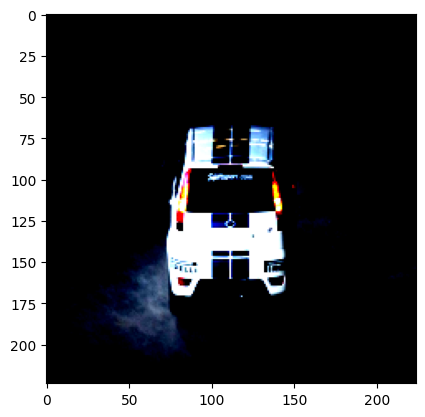

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


Label of the image is:  ['person', 'horse']


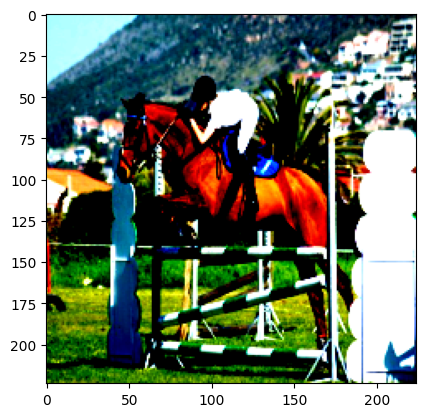

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.64].


Label of the image is:  ['bicycle', 'bicycle', 'bicycle', 'person', 'person', 'person']


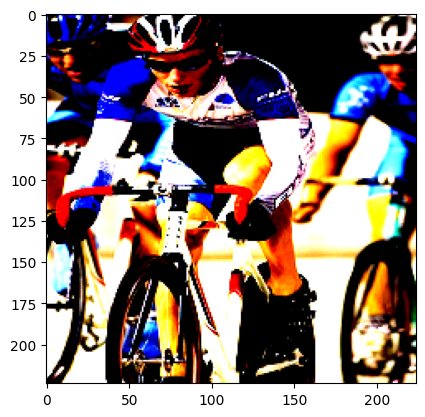

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.622571].


Label of the image is:  ['car']


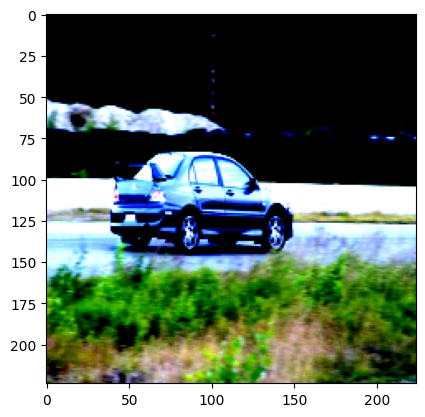

Label of the image is:  ['aeroplane', 'aeroplane', 'person', 'person']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.64].


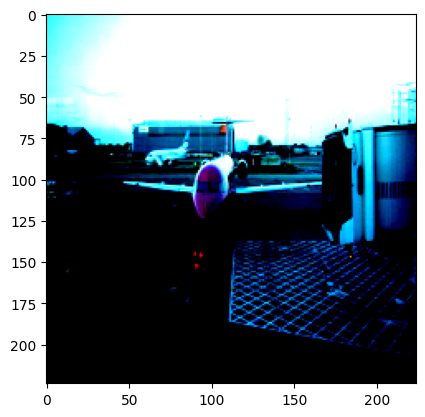

In [ ]:
plot_images(voc_data_train, number_of_images = 5)

In [ ]:
## store images in a list:

train_img = []
for i in range(len(voc_data_train)):
    train_img.append(voc_data_train[i][0])

train_img[0]

tensor([[[-0.9534, -0.9877, -0.9877,  ..., -1.1075, -1.1589, -1.2103],
         [-0.9534, -0.9877, -0.9877,  ..., -1.0562, -1.1075, -1.1418],
         [-0.9534, -0.9534, -0.9534,  ..., -1.0390, -1.0390, -1.0390],
         ...,
         [-0.8164, -0.7993, -0.7650,  ..., -0.6623, -0.7308, -0.7479],
         [-0.7650, -0.7650, -0.7308,  ..., -0.7137, -0.7137, -0.7137],
         [-0.7137, -0.7137, -0.7137,  ..., -0.7479, -0.7479, -0.7650]],

        [[-0.8452, -0.8803, -0.8803,  ..., -1.0378, -1.0378, -1.0728],
         [-0.8452, -0.8803, -0.8803,  ..., -0.9853, -0.9853, -1.0028],
         [-0.8452, -0.8452, -0.8452,  ..., -0.9503, -0.8978, -0.9153],
         ...,
         [-0.7227, -0.7227, -0.6877,  ..., -0.6176, -0.6176, -0.6352],
         [-0.6702, -0.6702, -0.6527,  ..., -0.6176, -0.6001, -0.6001],
         [-0.6176, -0.6176, -0.6352,  ..., -0.6527, -0.6352, -0.6527]],

        [[-0.6541, -0.6715, -0.6541,  ..., -0.7936, -0.8110, -0.8633],
         [-0.6541, -0.6715, -0.6541,  ..., -0

### extracting labels from the data

In [ ]:
## extracting labels from the data
images = {}  ## stores the labels for each sample (key: sample index, val: labels)

uniq = []

for img in range(len(voc_data_train)):

    objects = voc_data_train[img][1]['annotation']['object']
    total_objects = len(objects)

    # print(objects)
    # print(total_objects)

    label = []

    for obj in range(total_objects):

        extract_name = voc_data_train[img][1]['annotation']['object'][obj]['name']

        label.append(extract_name)

        if extract_name not in uniq:
            uniq.append(extract_name)

    images[img] = list(set(label))


In [ ]:
images[0], images[1], images[2], images[3], images[4], images[5]


(['car'],
 ['person', 'horse'],
 ['person', 'bicycle'],
 ['car'],
 ['aeroplane', 'person'],
 ['aeroplane'])

In [ ]:
uniq

['car',
 'person',
 'horse',
 'bicycle',
 'aeroplane',
 'train',
 'diningtable',
 'dog',
 'chair',
 'cat',
 'bird',
 'boat',
 'pottedplant',
 'tvmonitor',
 'sofa',
 'motorbike',
 'bottle',
 'bus',
 'sheep',
 'cow']

### checking class distribution in the dataset

In [ ]:
counter_dict = {}

for labels in images.values():

    for item in labels:

        if item not in counter_dict:
            counter_dict[item] = 1
        else:
            counter_dict[item]+=1

counter_dict

{'car': 402,
 'person': 1070,
 'horse': 144,
 'bicycle': 122,
 'aeroplane': 113,
 'train': 128,
 'diningtable': 130,
 'dog': 210,
 'chair': 282,
 'cat': 166,
 'bird': 182,
 'boat': 87,
 'pottedplant': 153,
 'tvmonitor': 144,
 'sofa': 188,
 'motorbike': 123,
 'bottle': 153,
 'bus': 100,
 'sheep': 49,
 'cow': 71}

*clearly there is class imbalance. Number of samples for person and car is very high. boat, sheep, cow has very low number of samples. Since each image has multilabels we cannot simply delete the images with labels persons. It will reduce the count for other labels as well. We can eliminate labels which has count not in the range 150-250, not removing other labels associated.*

In [ ]:
## classes to eliminate
labels_to_eliminate =[]

for item in uniq:
    if counter_dict[item] <= 150 or counter_dict[item] >= 250:
        labels_to_eliminate.append(item)

labels_to_eliminate

['car',
 'person',
 'horse',
 'bicycle',
 'aeroplane',
 'train',
 'diningtable',
 'chair',
 'boat',
 'tvmonitor',
 'motorbike',
 'bus',
 'sheep',
 'cow']

In [ ]:
upd_train_labels = []
upd_train_img = []

for i, labels in images.items():
    rej = False
    for item in labels:
        if item in labels_to_eliminate:
            rej = True
            break
    if not rej:
        upd_train_labels.append(labels)
        upd_train_img.append(train_img[i])

In [ ]:
print('length of training dataset:', len(upd_train_img))

length of training dataset: 514


### vectorising the labels

In [ ]:
## classes present in the new train set
upd_labels = [item for item in uniq if item not in labels_to_eliminate]
num_classes = len(upd_labels)
print('number of classes:', num_classes)
print(upd_labels)

number of classes: 6
['dog', 'cat', 'bird', 'pottedplant', 'sofa', 'bottle']


In [ ]:
## vectorising
from sklearn.feature_extraction.text import CountVectorizer

# Create a Vectorizer Object
vectorizer = CountVectorizer()

vectorizer.fit(upd_labels)

CountVectorizer()

In [ ]:
# Encode each classes
vector = vectorizer.transform(upd_labels)

In [ ]:
print("Vocabulary: ", vectorizer.vocabulary_)

Vocabulary:  {'dog': 3, 'cat': 2, 'bird': 0, 'pottedplant': 4, 'sofa': 5, 'bottle': 1}


In [ ]:
## creating a dictionary which has class name as keys and class index as values
label_to_id  = vectorizer.vocabulary_
id_to_label = {}   ## class index as keys and class names as values

for item, val in label_to_id.items():
    id_to_label[val] = item

In [ ]:
label_to_id

{'dog': 3, 'cat': 2, 'bird': 0, 'pottedplant': 4, 'sofa': 5, 'bottle': 1}

In [ ]:
id_to_label

{3: 'dog', 2: 'cat', 0: 'bird', 4: 'pottedplant', 5: 'sofa', 1: 'bottle'}

In [ ]:
### store all the classes in the order of their class index
labels_all = [id_to_label[i] for i in range(len(id_to_label))]
labels_all

['bird', 'bottle', 'cat', 'dog', 'pottedplant', 'sofa']

In [ ]:
## store class names and its vector representations
labels_to_vec ={}
for i,item in enumerate(vectorizer.vocabulary_.keys()):
    labels_to_vec[item] = vector.toarray()[i]

In [ ]:
labels_to_vec

{'dog': array([0, 0, 0, 1, 0, 0]),
 'cat': array([0, 0, 1, 0, 0, 0]),
 'bird': array([1, 0, 0, 0, 0, 0]),
 'pottedplant': array([0, 0, 0, 0, 1, 0]),
 'sofa': array([0, 0, 0, 0, 0, 1]),
 'bottle': array([0, 1, 0, 0, 0, 0])}

In [ ]:
## store labels as vectors for each sample

img_labels_vec = []

for i in range(len(upd_train_img)):
    labels = upd_train_labels[i]
    dummy  = [0]*num_classes
    for l in labels:
        dummy += labels_to_vec[l]

    img_labels_vec.append(dummy)

In [ ]:
img_labels_vec[0], img_labels_vec[42]

(array([0, 0, 0, 1, 0, 0]), array([0, 0, 1, 1, 0, 1]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..1.8382572].


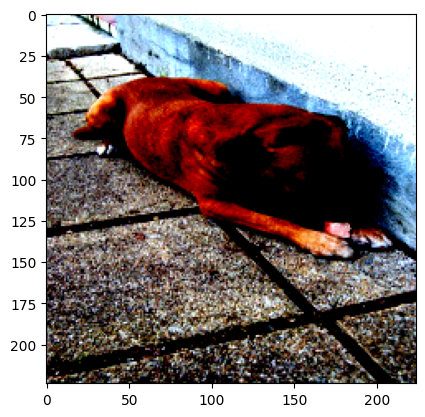

In [ ]:
image = upd_train_img[0].numpy().transpose((1, 2, 0))

plt.imshow(image)
plt.show()

Images have more than 2 labels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0151556..2.622571].


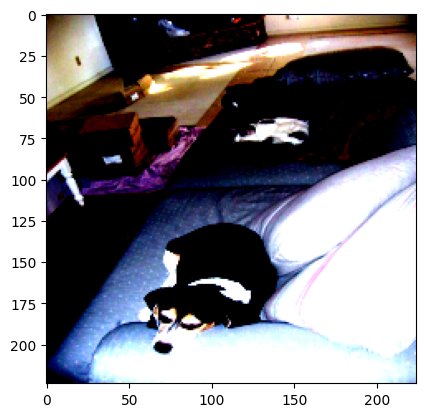

In [ ]:
                                           # H, W, C
image = upd_train_img[42].numpy().transpose((1, 2, 0))

plt.imshow(image)
plt.show()

In [ ]:
# for i in range(len(img_labels_vec)):
#     print(i, img_labels_vec[i])

### Validation set

In [ ]:
# Load the VOC validation dataset
voc_data_val = datasets.VOCDetection(root='content/voc', download=True,image_set='val', year='2007', transform=transform)

Using downloaded and verified file: content/voc/VOCtrainval_06-Nov-2007.tar
Extracting content/voc/VOCtrainval_06-Nov-2007.tar to content/voc


In [ ]:
len(voc_data_val)

2510

In [ ]:
## store image
val_img=[]
for i in range(len(voc_data_val)):
    val_img.append(voc_data_val[i][0])

In [ ]:
## extract labels

upd_val_labels = []
upd_val_img = []

for img in range(len(voc_data_val)):
    objects = len(voc_data_val[img][1]['annotation']['object'])
    labelss = []
    r = False
    for obj in range(objects):
        label = voc_data_val[img][1]['annotation']['object'][obj]['name']
        if label in labels_to_eliminate:
            r =True
            break
        labelss.append(label)

    if not r:
        upd_val_labels.append(list(set(labelss)))
        upd_val_img.append(val_img[img])

In [ ]:
## store labels in vector representation

img_labels_vec_val = []

for i in range(len(upd_val_img)):
    labels = upd_val_labels[i]
    dummy  = [0]*num_classes
    for l in labels:
        # print(l)
        dummy += labels_to_vec[l]
    img_labels_vec_val.append(dummy)

In [ ]:
len(upd_val_img), upd_val_labels[465], img_labels_vec_val[465]

(516, ['dog', 'sofa'], array([0, 0, 0, 1, 0, 1]))

In [ ]:
# for i in range(len(upd_val_img)):
#     print(i, upd_val_labels[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9466565..2.64].


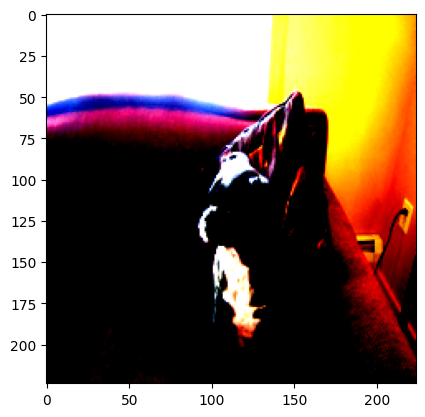

In [ ]:
image = upd_val_img[465].numpy().transpose((1, 2, 0))

plt.imshow(image)
plt.show()

#### test data

In [ ]:
voc_data_test = datasets.VOCDetection(root='content/voc', download=True,image_set='test', year='2007', transform=transform)

100%|██████████| 451020800/451020800 [00:20<00:00, 22489644.34it/s]


Extracting content/voc/VOCtest_06-Nov-2007.tar to content/voc


In [ ]:
len(voc_data_test)

4952

In [ ]:
## store image
test_img = []
for i in range(len(voc_data_test)):
    test_img.append(voc_data_test[i][0])
# test_img[0]

In [ ]:
## extract labels

upd_test_labels = []
upd_test_img = []
for img in range(len(voc_data_test)):
    objects = len(voc_data_test[img][1]['annotation']['object'])
    labelss = []
    r= False
    for obj in range(objects):
        label = voc_data_test[img][1]['annotation']['object'][obj]['name']
        if label in labels_to_eliminate:
            r =True
            break
        labelss.append(label)

    if not r:
        upd_test_labels.append(list(set(labelss)))
        upd_test_img.append(test_img[img])

In [ ]:
## store labels in vector representation
img_labels_vec_test = []
for i in range(len(upd_test_img)):
    labels = upd_test_labels[i]
    dummy  = [0]*num_classes
    for l in labels:
        dummy += labels_to_vec[l]
    img_labels_vec_test.append(dummy)

In [ ]:
# for i in range(len(upd_test_img)):
#     print(i, upd_test_labels[i])

In [ ]:
upd_test_labels[987], img_labels_vec_test[987]

(['pottedplant', 'bottle', 'cat'], array([0, 1, 1, 0, 1, 0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0494049..2.6051416].


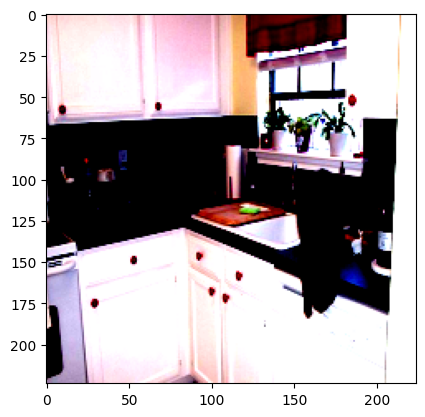

In [ ]:
image = upd_test_img[987].numpy().transpose((1, 2, 0))

plt.imshow(image)
plt.show()

**Shuffling and creating batches of data-**

In [ ]:
## train_list store tuple of images and labels
train_list = []
for i in range(len(upd_train_img)):
    train_list.append(tuple([upd_train_img[i],img_labels_vec[i]]))

In [ ]:
## val_list store tuple of images and labels
val_list = []
for i in range(len(upd_val_img)):
    val_list.append(tuple([upd_val_img[i],img_labels_vec_val[i]]))

In [ ]:
## test_list store tuple of images and labels
test_list = []
for i in range(len(upd_test_img)):
    test_list.append(tuple([upd_test_img[i],img_labels_vec_test[i]]))

In [ ]:
## making batches for train, validation and test data
train_dataloader = torch.utils.data.DataLoader(train_list, batch_size = 32, drop_last = True, shuffle = True)
val_dataloader   = torch.utils.data.DataLoader(val_list,   batch_size = 32, drop_last = True, shuffle = False)
test_dataloader  = torch.utils.data.DataLoader(test_list,  batch_size = 32, drop_last = True, shuffle = False)

In [ ]:
## printing the size of train, validation and test data
print("Training dataset size: ",   len(upd_train_img))
print("Validation dataset size: ", len(upd_val_img))
print("Testing dataset size: ",    len(upd_test_img))

Training dataset size:  514
Validation dataset size:  516
Testing dataset size:  1020


In [ ]:
## printing the batches in train, validation and test data
print("No. of batches in Training dataset : ", len(train_dataloader))
print("No. of batches in Validation dataset : ", len(val_dataloader))
print("No. of batches in Testing dataset : ", len(test_dataloader))

No. of batches in Training dataset :  16
No. of batches in Validation dataset :  16
No. of batches in Testing dataset :  31


In [ ]:
##plotting sample image

# for i in range(5):
#     image, target = train_list[i]
#     indices = np.where(np.array(target)==1)[0] ## indices where value = 1
#     target_labels = [] ## store labels
#     for i in indices:
#         target_labels.append(dic_embd_label[i])

#     print('label', target_labels)
#     plt.imshow(image.permute(1,2,0))  # we need permute here because matplotlib wants to have the channels as the last dimension
#     plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


Shape of an Image (Batch Size, RGB, Pixels): torch.Size([32, 3, 224, 224])


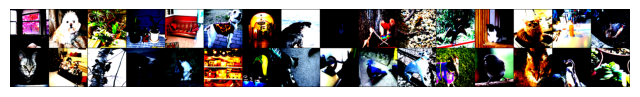

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


Shape of an Image (Batch Size, RGB, Pixels): torch.Size([32, 3, 224, 224])


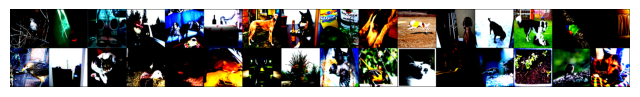

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


Shape of an Image (Batch Size, RGB, Pixels): torch.Size([32, 3, 224, 224])


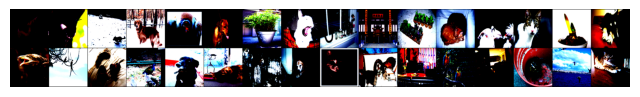

Shape of an Image (Batch Size, RGB, Pixels): torch.Size([32, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


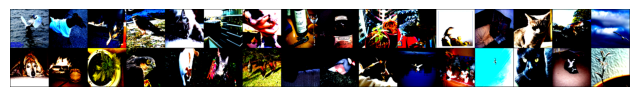

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


Shape of an Image (Batch Size, RGB, Pixels): torch.Size([32, 3, 224, 224])


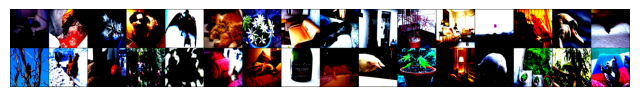

Shape of an Image (Batch Size, RGB, Pixels): torch.Size([32, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


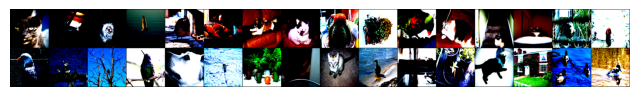

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


Shape of an Image (Batch Size, RGB, Pixels): torch.Size([32, 3, 224, 224])


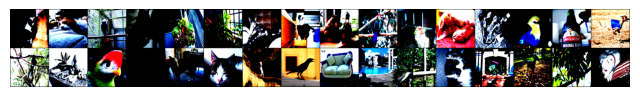

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


Shape of an Image (Batch Size, RGB, Pixels): torch.Size([32, 3, 224, 224])


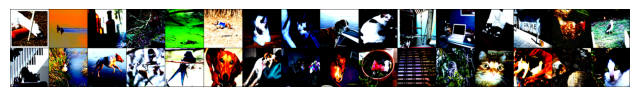

Shape of an Image (Batch Size, RGB, Pixels): torch.Size([32, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


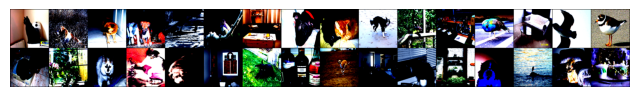

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


Shape of an Image (Batch Size, RGB, Pixels): torch.Size([32, 3, 224, 224])


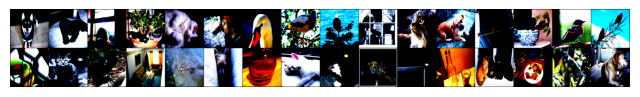

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


Shape of an Image (Batch Size, RGB, Pixels): torch.Size([32, 3, 224, 224])


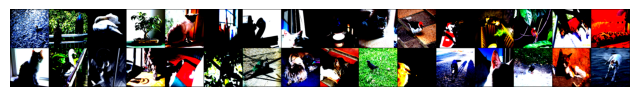

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


Shape of an Image (Batch Size, RGB, Pixels): torch.Size([32, 3, 224, 224])


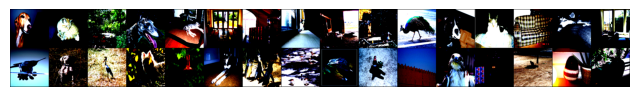

Shape of an Image (Batch Size, RGB, Pixels): torch.Size([32, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


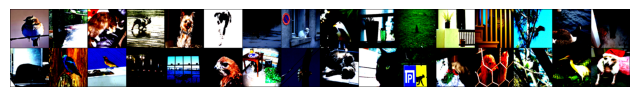

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


Shape of an Image (Batch Size, RGB, Pixels): torch.Size([32, 3, 224, 224])


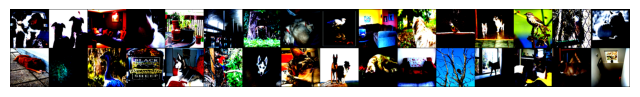

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


Shape of an Image (Batch Size, RGB, Pixels): torch.Size([32, 3, 224, 224])


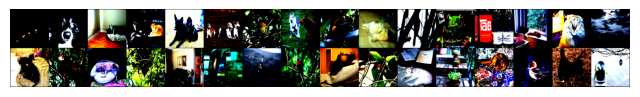

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


Shape of an Image (Batch Size, RGB, Pixels): torch.Size([32, 3, 224, 224])


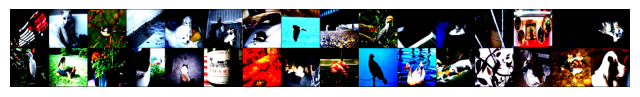

In [ ]:
for img, _ in train_dataloader:
    print('Shape of an Image (Batch Size, RGB, Pixels):', img.shape)
    plt.figure(figsize = (8, 4))
    plt.axis('off')
    plt.imshow(make_grid(img, nrow = 16).permute((1,2,0))) # we need permute here because matplotlib wants to have the channels as the last dimension
    plt.show();

## ResNet

### Residual block:

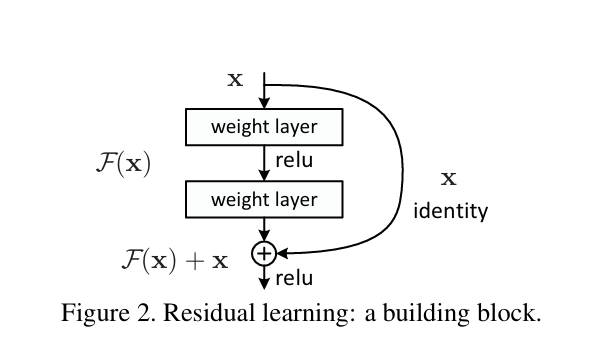

$\textbf{Source:}$ https://arxiv.org/pdf/1512.03385

Formally, in this paper we consider a building block defined as:
$$
\mathbf{y}=\mathcal{F}\left(\mathbf{x},\left\{W_i\right\}\right)+\mathbf{x} \quad ...    \quad (1)
$$

Here $\mathbf{x}$ and $\mathbf{y}$ are the input and output vectors of the layers considered. The function $\mathcal{F}\left(\mathbf{x},\left\{W_i\right\}\right)$ represents the residual mapping to be learned. For the example in Fig. 2. that has two layers, $\mathcal{F}=W_2 \sigma\left(W_1 \mathbf{x}\right)$ in which $\sigma$ denotes ReLU activation.


$$
\mathbf{y}=\mathcal{F}\left(\mathbf{x},\left\{W_i\right\}\right)+W_s \mathbf{x}
$$

The dimensions of $\mathbf{x}$ and $\mathcal{F}$ must be equal in Eqn.(1).

### Resnet 18 architecture

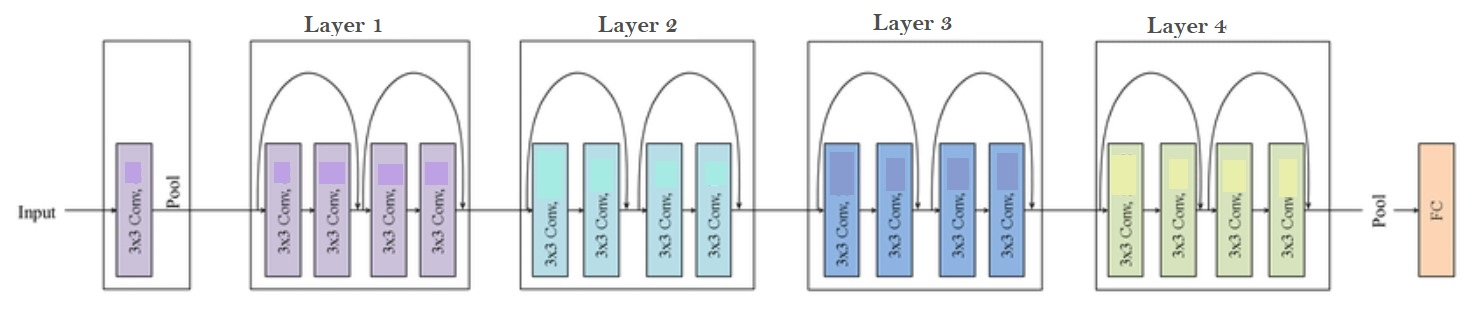

In [ ]:
num_classes

6

In [ ]:
# 3x3 convolution
def conv3x3(in_channels, out_channels, stride = 1):

    return nn.Conv2d(in_channels, out_channels, kernel_size = 3,
                     stride = stride, padding = 1, bias = False)


# Residual block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride = 1, downsample = None):
        super(ResidualBlock, self).__init__()

        self.conv1 = conv3x3(in_channels, out_channels, stride)  # convolution layer 1
        self.bn1   = nn.BatchNorm2d(out_channels)                # Create a batch normalization layer (bn1) for the output channels (out_channels)
        self.relu  = nn.ReLU(inplace = True)                     # use activation function = ReLU
        self.conv2 = conv3x3(out_channels, out_channels)         # convolution layer 2
        self.bn2   = nn.BatchNorm2d(out_channels)                # Create a batch normalization layer (bn2) for the output channels (out_channels)
        self.downsample = downsample                             # downsample : it is a layer to match the number of channels  of residual and output of conv1 and conv2

    # forward pass of residual block

    def forward(self, x):

        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample:
            residual = self.downsample(x)   ## update residual by matching the number of channels  of residual and out

        out += residual
        out = self.relu(out)
        return out

# ResNet
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes = num_classes):
        super(ResNet, self).__init__()

        self.in_channels = 16                                                 # subsequent layers will start with 16 input channels.

        self.conv = conv3x3(in_channels = 3, out_channels = 16)               # first convolution layer in the ResNet
        self.bn   = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace = True)                                   # operation modifies the input tensor directly without allocating additional memory for the output.

        self.layer1 = self.make_layer(block, 16, layers[0], stride = 1)       # this layer consists of layers[0] numbers of residual blocks
        self.layer2 = self.make_layer(block, 32, layers[1], stride = 2)       # this layer consists of layers[1] numbers of residual blocks
        self.layer3 = self.make_layer(block, 64, layers[2], stride = 2)       # this layer consists of layers[2] numbers of residual blocks
        self.layer4 = self.make_layer(block, 128, layers[3],stride = 2)       # this layer consists of layers[3] numbers of residual blocks

        # Create an average pooling layer (avg_pool) with a kernel size of 8x8
        self.avg_pool = nn.AvgPool2d(8)

        self.fc = nn.Linear(1152, num_classes)

    # make layer function: create layers which consists of given number of residual blocks
    def make_layer(self, block, out_channels, blocks, stride = 1):

        '''
        block: residual block
        blocks: number of residual blocks required in this layer
        '''

        downsample = None

        # define downsample if stride != 1
        if (stride != 1) or (self.in_channels != out_channels):

            # downsample consists of one convolution layer
            downsample = nn.Sequential(
                                        conv3x3(self.in_channels, out_channels, stride = stride),
                                        nn.BatchNorm2d(out_channels)
                                        )
        layers = []

        layers.append(block(self.in_channels, out_channels, stride, downsample))  ## appending residual blocks

        self.in_channels = out_channels                                           # Store the output channels of previous layer to the input channels of next layer

        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))                      ## appending residual blocks

        ## now the list layers has "blocks" number of residual blocks
        return nn.Sequential(*layers)

    ## forward pass
    def forward(self, x):

        # Pass the input through the convolutional layer (conv)
        out = self.conv(x)

        # Apply batch normalization (bn)
        out = self.bn(out)

        # Apply the rectified linear unit (ReLU) activation function
        out = self.relu(out)

        # Pass through the first residual layer (layer1)
        out = self.layer1(out)

        # Pass through the second residual layer (layer2)
        out = self.layer2(out)

        # Pass through the third residual layer (layer3)
        out = self.layer3(out)

        # Pass through the fourth residual layer (layer4)
        out = self.layer4(out)

        # Apply average pooling (avg_pool)
        out = self.avg_pool(out)

        # Reshape the output to a 1D tensor
        out = out.view(out.size(0), -1)

        # Pass through the fully connected layer (fc)
        out = self.fc(out)

        # Return the final output
        return out



In [ ]:
#Initialising the model
model = ResNet(ResidualBlock, [2, 2, 2,2])  ## layers = [2,2,2,2] --> each residual layer consists of 2 residual blocks
print("The overall model is - \n")
print(model)
dash = "________________________________________________________________________\n\n"
print(dash)


criterion = torch.nn.BCEWithLogitsLoss()  ## loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.01,momentum=0.9, weight_decay=0.001)  ## optimizer

The overall model is - 

ResNet(
  (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

In [ ]:
from torchsummary import summary

# Assuming 'model' is your PyTorch model
summary(model, input_size=(3, 224, 224), batch_size = 32)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [32, 16, 224, 224]             432
       BatchNorm2d-2         [32, 16, 224, 224]              32
              ReLU-3         [32, 16, 224, 224]               0
            Conv2d-4         [32, 16, 224, 224]           2,304
       BatchNorm2d-5         [32, 16, 224, 224]              32
              ReLU-6         [32, 16, 224, 224]               0
            Conv2d-7         [32, 16, 224, 224]           2,304
       BatchNorm2d-8         [32, 16, 224, 224]              32
              ReLU-9         [32, 16, 224, 224]               0
    ResidualBlock-10         [32, 16, 224, 224]               0
           Conv2d-11         [32, 16, 224, 224]           2,304
      BatchNorm2d-12         [32, 16, 224, 224]              32
             ReLU-13         [32, 16, 224, 224]               0
           Conv2d-14         [32, 16, 2

In [ ]:
num_epochs = 30
train_loss = list()
val_loss = list()
train_accuracy = list()
val_accuracy = list()
best_val_loss = 1
total_train = 0
correct_train = 0
total_val = 0
correct_val = 0
patience_counter = 0
patience = 5
for epoch in range(num_epochs):
    total_train_loss = 0
    total_val_loss = 0
    total_train = 0
    correct_train = 0
    model.train()
    total_p = 0
    # training
    for itr, (image, label) in enumerate(train_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model(image)

        # Use binary cross-entropy loss for multilabel classification
        criterion = torch.nn.BCEWithLogitsLoss()
        loss = criterion(pred, label.float())
        total_train_loss += loss.item()

        # Calculate accuracy for multilabel classification
        predicted = (torch.sigmoid(pred) > 0.5).float()   ## use sigmoid function to convert logits into probability, threshold =0.5
        correct_train += (predicted == label).sum().item()
        total_train += label.size(0)

        loss.backward()  ## backward pass
        optimizer.step()  ## parameter update

    accuracy_train = (100 * correct_train) / (total_train * label.size(1))  # Calculate accuracy per label
    train_accuracy.append(accuracy_train)
    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)

    # validation
    model.eval()
    total_val = 0
    correct_val = 0
    for itr, (image, label) in enumerate(val_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        pred = model(image)   ## prediction

        loss = criterion(pred, label.float())
        total_val_loss += loss.item()

        predicted = (torch.sigmoid(pred) > 0.5).float()   ## use sigmoid function to convert logits into probability, threshold =0.5
        correct_val += (predicted == label).sum().item()
        total_val += label.size(0)


    accuracy = (100 * correct_val) / (total_val * label.size(1))  # Calculate accuracy per label
    val_accuracy.append(accuracy)
    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)



    print('\nEpoch: {}/{}, Train Loss: {:.8f},Train Accuracy: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, num_epochs, total_train_loss,accuracy_train, total_val_loss, accuracy))


    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(model.state_dict(), "model.dth")  ## saving best model
        patience_counter=0  ## reset patience_counter to zero
    else:
        patience_counter+=1  ## increment patience_counter by 1

    ## early stopping condition
    if patience_counter==patience:
        print('Early Stopping')
        break


Epoch: 1/30, Train Loss: 0.53673639,Train Accuracy: 79.88281250, Val Loss: 0.47425955, Val Accuracy: 74.93489583
Saving the model state dictionary for Epoch: 1 with Validation loss: 0.47425955

Epoch: 2/30, Train Loss: 0.44407902,Train Accuracy: 81.83593750, Val Loss: 0.44276561, Val Accuracy: 82.32421875
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.44276561

Epoch: 3/30, Train Loss: 0.39887357,Train Accuracy: 82.64973958, Val Loss: 0.41404704, Val Accuracy: 82.55208333
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.41404704

Epoch: 4/30, Train Loss: 0.38237767,Train Accuracy: 83.78906250, Val Loss: 0.40888998, Val Accuracy: 82.25911458
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.40888998

Epoch: 5/30, Train Loss: 0.36777376,Train Accuracy: 84.04947917, Val Loss: 0.61644477, Val Accuracy: 77.70182292

Epoch: 6/30, Train Loss: 0.37441845,Train Accuracy: 83.72395833, Val Loss: 0.61330547, Val Accuracy: 76.66015

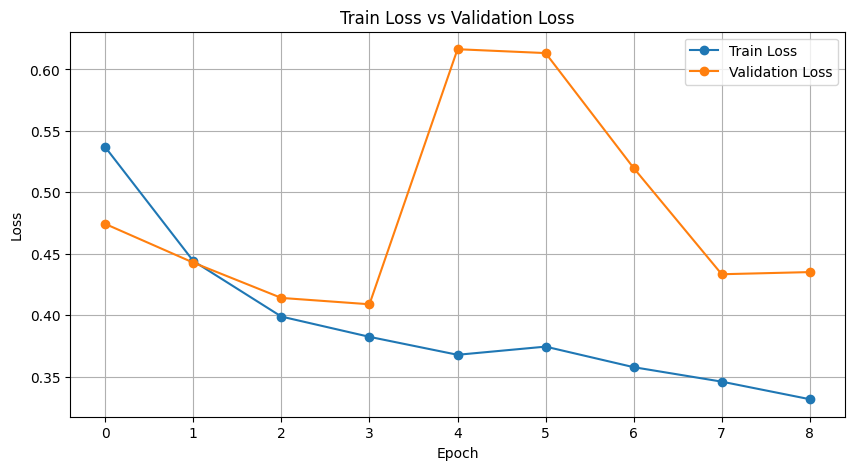

In [ ]:
# Plot train loss and validation loss
plt.figure(figsize=(10,5))
plt.plot(train_loss, label='Train Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='o')

# Add labels and a legend
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Display the plot
plt.grid()
plt.title('Train Loss vs Validation Loss')
plt.show()

In [ ]:
## create dataframe of the results
def TabularFormat(epochs,train_cost,train_acc,eval_cost,eval_acc):
  ep = []
  for i in range(1,epochs+1):
    ep.append(i)
  return pd.DataFrame(list(zip(ep,train_cost,train_acc,eval_cost,eval_acc)),columns = ['Epoch Value','Training Loss','Training Accuracy','Validation loss','Validation Accuracy'])

In [ ]:
import pandas as pd
df = TabularFormat(num_epochs,train_loss,train_accuracy,val_loss,val_accuracy)
df

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,0.536736,79.882812,0.474260,74.934896
1,2,0.444079,81.835938,0.442766,82.324219
2,3,0.398874,82.649740,0.414047,82.552083
3,4,0.382378,83.789062,0.408890,82.259115
4,5,0.367774,84.049479,0.616445,77.701823
5,6,0.374418,83.723958,0.613305,76.660156
6,7,0.357691,84.798177,0.519760,79.492188
7,8,0.345917,84.928385,0.433327,81.152344
8,9,0.331613,85.807292,0.435075,81.608073


### Evaluating model

In [ ]:
total_test_loss = 0
test_accuracy=[]
test_loss = []
pred_list = []
true_list = []
# testing model
model_best = ResNet(ResidualBlock, [2, 2, 2,2])

## load the best model
model_best.load_state_dict(torch.load('model.dth'))
model_best.eval()
total_test = 0
correct_test = 0
for itr, (image, label) in enumerate(test_dataloader):

    if (torch.cuda.is_available()):
        image = image.cuda()
        label = label.cuda()
        # if torch.cuda.is_available():
        model_best = model_best.to('cuda')


        pred = model_best(image)

        loss = criterion(pred, label.float())
        total_test_loss += loss.item()

        predicted = (torch.sigmoid(pred) > 0.5).float()
        correct_test += (predicted == label).sum().item()
        total_test += label.size(0)

        ## store predicted and true labels
        pred_list.append(predicted)
        true_list.append(label)



    accuracy = (100 * correct_test) / (total_test * label.size(1))  # Calculate accuracy per label
    test_accuracy.append(accuracy)
    total_test_loss = total_test_loss / (itr + 1)
    test_loss.append(total_test_loss)


print('\n Test Loss: {:.8f}, Test Accuracy: {:.8f}'.format( total_test_loss, accuracy))

/tmp/ipykernel_4024353/851714346.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_best.load_state_dict(torch.load('model.dth'))



 Test Loss: 0.01373829, Test Accuracy: 82.12365591


In [ ]:
pred_cat = torch.cat(pred_list, dim =0)
true_cat = torch.cat(true_list, dim = 0)

In [ ]:
print(pred_cat.shape)
print(true_cat.shape)

torch.Size([992, 6])
torch.Size([992, 6])


*Accuracy alone does not provide a comprehensive understanding of a classification task. To gain deeper insights into model performance, it's essential to consider metrics such as precision, recall, and F1-score. These metrics offer a more detailed evaluation of how well the model classifies different categories and can reveal areas where the model may require improvement.*

## confusion matrix

In [ ]:
labels_all

['bird', 'bottle', 'cat', 'dog', 'pottedplant', 'sofa']

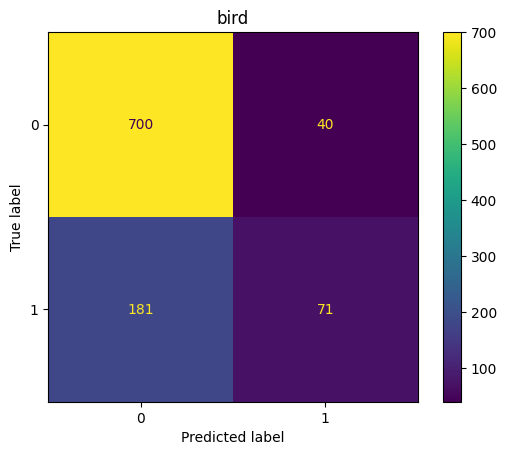

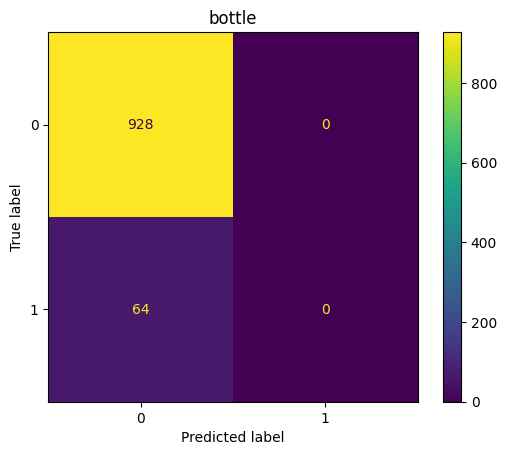

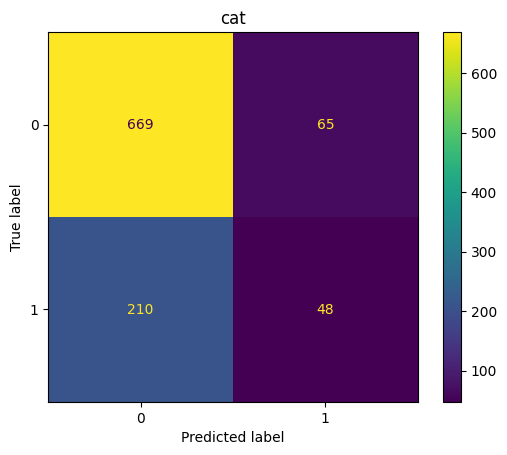

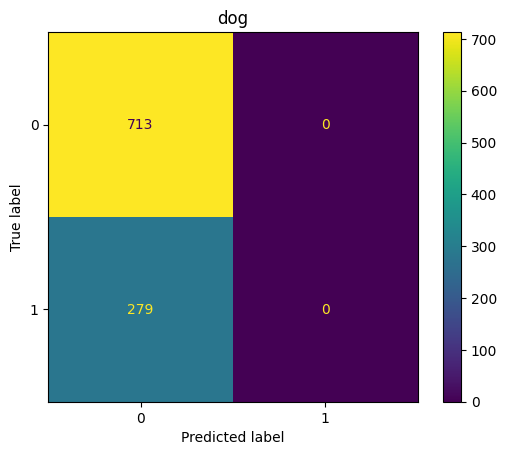

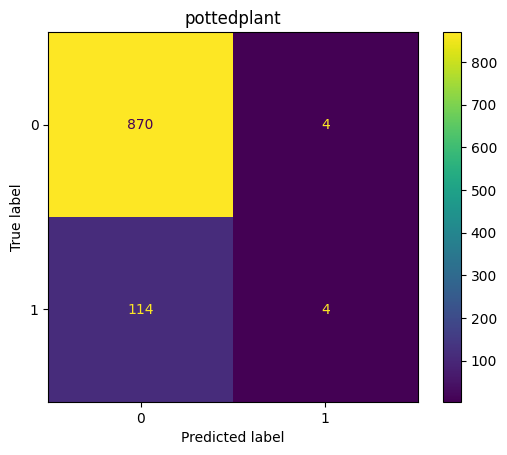

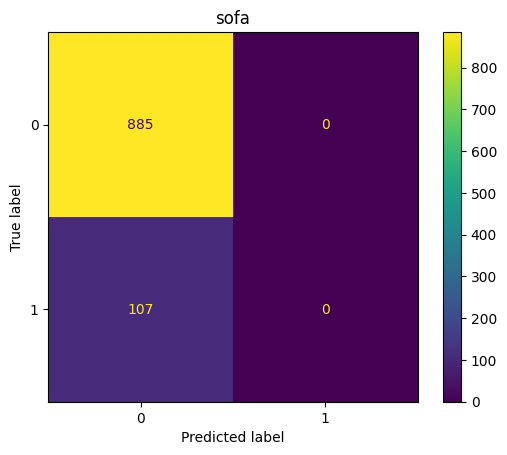

In [ ]:
# Move the tensor to CPU memory
pred_cat_cpu = pred_cat.cpu()
true_cat_cpu = true_cat.cpu()

# plot multilabel_confusion_matrix for each class
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
confusion = multilabel_confusion_matrix(true_cat_cpu, pred_cat_cpu)

# Display the confusion matrix
for i,item in enumerate(confusion):
    disp = ConfusionMatrixDisplay(item)
    disp.plot(cmap='viridis')
    plt.title(labels_all[i])
    plt.show()

*This model is biased towards predicting 0*

In [ ]:
## classification report
from sklearn.metrics import classification_report

label_names = [id_to_label[i] for i in range(len(id_to_label))]

print(classification_report(true_cat_cpu, pred_cat_cpu,target_names=label_names, zero_division=0))

              precision    recall  f1-score   support

        bird       0.64      0.28      0.39       252
      bottle       0.00      0.00      0.00        64
         cat       0.42      0.19      0.26       258
         dog       0.00      0.00      0.00       279
 pottedplant       0.50      0.03      0.06       118
        sofa       0.00      0.00      0.00       107

   micro avg       0.53      0.11      0.19      1078
   macro avg       0.26      0.08      0.12      1078
weighted avg       0.31      0.11      0.16      1078
 samples avg       0.12      0.12      0.12      1078



### Conclusion:

This model demonstrates limited performance with lower precision and recall values. The smaller number of samples for each class could be the main reason for this lower performance.  

In [ ]:
import torch
from torchvision import transforms
import torchvision.datasets as datasets
from torch import nn
from torch import optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

Performance of ResNet 18 on CIFAR10 Dataset

In [ ]:
# Define transformations
transform = transforms.Compose([
                                    transforms.Resize((224, 224)),   # Resize images to the input size expected by ResNet
                                    transforms.ToTensor(),           # Convert images to PyTorch tensors
                                                                # list of mean, std values for each channel
                                    transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]),  # Normalize pixel values
                                ])

In [ ]:
cifar_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
cifar_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
cifar_trainset, cifar_valset = torch.utils.data.random_split(cifar_trainset, [int(0.8 * len(cifar_trainset)), int(0.2 * len(cifar_trainset))])

In [ ]:
train_dataloader = torch.utils.data.DataLoader(cifar_trainset, batch_size=64, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(cifar_valset, batch_size=64, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(cifar_testset, batch_size=64, shuffle=False)

In [ ]:
num_classes = 10

In [ ]:
#Initialising the model
model = ResNet(ResidualBlock, [2, 2, 2,2])  ## layers = [2,2,2,2] --> each residual layer consists of 2 residual blocks

criterion = torch.nn.BCEWithLogitsLoss()  ## loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.01,momentum=0.9, weight_decay=0.001)  ## optimizer

In [ ]:
device = 'cuda:1' if torch.cuda.is_available() else 'cpu'
model = model.to(device)
device

'cuda:1'

In [ ]:
import torch.nn.functional as F

for x, y in train_dataloader:
    print(f"Image batch shape: {x.shape}, Label batch shape (before one-hot): {y.shape}")

    # Convert class labels (integers) to one-hot encoded vectors
    num_classes = 10  # Assuming CIFAR-10 has 10 classes
    one_hot_labels = F.one_hot(y, num_classes)  # Convert to one-hot, shape: [batch_size, num_classes]

    print(f"Label batch shape (after one-hot): {one_hot_labels.shape}")
    break  # Stop after the first batch


Image batch shape: torch.Size([64, 3, 224, 224]), Label batch shape (before one-hot): torch.Size([64])
Label batch shape (after one-hot): torch.Size([64, 10])


In [ ]:
num_epochs = 20
train_loss = []
val_loss = []
train_accuracy = []
val_accuracy = []
best_val_loss = float('inf')
count = 0

from tqdm import tqdm

for epoch in range(num_epochs):
    total_train_loss = 0
    total_val_loss = 0
    total_train = 0
    correct_train = 0
    model.train()

    # Training loop
    for itr, (image, label) in tqdm(enumerate(train_dataloader), total=len(train_dataloader)):

        image = image.to(device)
        label = label.to(device)

        optimizer.zero_grad()

        # Forward pass
        pred = model(image)
        one_hot_labels = F.one_hot(label, num_classes).float()

        # print(one_hot_labels.shape, pred.shape)
        # Calculate loss using raw logits
        loss = criterion(pred, one_hot_labels)
        total_train_loss += loss.item()

        # Calculate accuracy
        predicted = torch.argmax(pred, dim=1)
        total_train += label.size(0)
        correct_train += (predicted == label).sum().item()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Compute training accuracy and loss
    accuracy_train = (100 * correct_train) / total_train
    train_accuracy.append(accuracy_train)
    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)

    # Validation loop
    model.eval()
    total_val = 0
    correct_val = 0
    with torch.no_grad():  # No gradients needed for validation
        for itr, (image, label) in tqdm(enumerate(val_dataloader), total=len(val_dataloader)):

            image = image.to(device)
            label = label.to(device)

            # Forward pass
            pred = model(image)

            one_hot_labels = F.one_hot(label, num_classes).float()

            # print(one_hot_labels.shape, pred.shape)
            # Calculate loss using raw logits
            loss = criterion(pred, one_hot_labels)
            total_val_loss += loss.item()

            # Calculate accuracy
            predicted = torch.argmax(pred, dim=1)
            total_val += label.size(0)
            correct_val += (predicted == label).sum().item()

    # Compute validation accuracy and loss
    accuracy_val = (100 * correct_val) / total_val
    val_accuracy.append(accuracy_val)
    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    print(f'\nEpoch: {epoch + 1}/{num_epochs}, Train Loss: {total_train_loss:.8f}, '
          f'Train Accuracy: {accuracy_train:.8f}, Val Loss: {total_val_loss:.8f}, Val Accuracy: {accuracy_val:.8f}')

    # Save the best model based on validation loss
    if total_val_loss < best_val_loss:
        count = 0
        best_val_loss = total_val_loss
        print(f"Saving the model state dictionary for Epoch: {epoch + 1} with Validation loss: {total_val_loss:.8f}")
        torch.save(model.state_dict(), "model.dth")
    else:
        count += 1

    # Early stopping if validation loss does not improve for 5 epochs
    if count == 5:
        print("Early stopping triggered.")
        break

100%|██████████| 157/157 [00:18<00:00,  8.72it/s]



Epoch: 1/20, Train Loss: 0.22633241, Train Accuracy: 48.57250000, Val Loss: 0.20505769, Val Accuracy: 55.18000000
Saving the model state dictionary for Epoch: 1 with Validation loss: 0.20505769


100%|██████████| 157/157 [00:18<00:00,  8.71it/s]



Epoch: 2/20, Train Loss: 0.19303598, Train Accuracy: 59.14500000, Val Loss: 0.18815725, Val Accuracy: 61.00000000
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.18815725


100%|██████████| 157/157 [00:18<00:00,  8.72it/s]



Epoch: 3/20, Train Loss: 0.17182985, Train Accuracy: 64.84000000, Val Loss: 0.16958142, Val Accuracy: 65.54000000
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.16958142


100%|██████████| 157/157 [00:18<00:00,  8.71it/s]



Epoch: 4/20, Train Loss: 0.15720562, Train Accuracy: 68.57000000, Val Loss: 0.16565877, Val Accuracy: 65.77000000
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.16565877


100%|██████████| 157/157 [00:18<00:00,  8.71it/s]



Epoch: 5/20, Train Loss: 0.14637830, Train Accuracy: 71.22500000, Val Loss: 0.15019448, Val Accuracy: 70.12000000
Saving the model state dictionary for Epoch: 5 with Validation loss: 0.15019448


100%|██████████| 157/157 [00:18<00:00,  8.69it/s]



Epoch: 6/20, Train Loss: 0.13806490, Train Accuracy: 73.74000000, Val Loss: 0.14357838, Val Accuracy: 71.75000000
Saving the model state dictionary for Epoch: 6 with Validation loss: 0.14357838


100%|██████████| 157/157 [00:18<00:00,  8.69it/s]



Epoch: 7/20, Train Loss: 0.13118078, Train Accuracy: 75.15500000, Val Loss: 0.14847400, Val Accuracy: 71.32000000


100%|██████████| 157/157 [00:17<00:00,  8.74it/s]



Epoch: 8/20, Train Loss: 0.12521317, Train Accuracy: 76.70500000, Val Loss: 0.13685481, Val Accuracy: 73.50000000
Saving the model state dictionary for Epoch: 8 with Validation loss: 0.13685481


100%|██████████| 157/157 [00:17<00:00,  8.75it/s]



Epoch: 9/20, Train Loss: 0.12026876, Train Accuracy: 77.94750000, Val Loss: 0.15359479, Val Accuracy: 69.69000000


100%|██████████| 157/157 [00:17<00:00,  8.77it/s]



Epoch: 10/20, Train Loss: 0.11565493, Train Accuracy: 79.13000000, Val Loss: 0.13048218, Val Accuracy: 74.75000000
Saving the model state dictionary for Epoch: 10 with Validation loss: 0.13048218


100%|██████████| 157/157 [00:17<00:00,  8.74it/s]



Epoch: 11/20, Train Loss: 0.11205771, Train Accuracy: 80.27000000, Val Loss: 0.13013154, Val Accuracy: 74.52000000
Saving the model state dictionary for Epoch: 11 with Validation loss: 0.13013154


100%|██████████| 157/157 [00:17<00:00,  8.76it/s]



Epoch: 12/20, Train Loss: 0.10891675, Train Accuracy: 80.84000000, Val Loss: 0.12575616, Val Accuracy: 75.77000000
Saving the model state dictionary for Epoch: 12 with Validation loss: 0.12575616


100%|██████████| 157/157 [00:17<00:00,  8.76it/s]



Epoch: 13/20, Train Loss: 0.10597734, Train Accuracy: 81.45750000, Val Loss: 0.13866610, Val Accuracy: 72.66000000


100%|██████████| 157/157 [00:17<00:00,  8.76it/s]



Epoch: 14/20, Train Loss: 0.10287105, Train Accuracy: 82.36000000, Val Loss: 0.12118637, Val Accuracy: 77.34000000
Saving the model state dictionary for Epoch: 14 with Validation loss: 0.12118637


100%|██████████| 157/157 [00:17<00:00,  8.75it/s]



Epoch: 15/20, Train Loss: 0.10046022, Train Accuracy: 82.83000000, Val Loss: 0.14055316, Val Accuracy: 72.11000000


100%|██████████| 157/157 [00:17<00:00,  8.79it/s]



Epoch: 16/20, Train Loss: 0.09858511, Train Accuracy: 83.32000000, Val Loss: 0.13215627, Val Accuracy: 73.90000000


100%|██████████| 157/157 [00:18<00:00,  8.72it/s]



Epoch: 17/20, Train Loss: 0.09632257, Train Accuracy: 83.69250000, Val Loss: 0.11846585, Val Accuracy: 77.27000000
Saving the model state dictionary for Epoch: 17 with Validation loss: 0.11846585


100%|██████████| 157/157 [00:17<00:00,  8.74it/s]



Epoch: 18/20, Train Loss: 0.09379069, Train Accuracy: 84.20250000, Val Loss: 0.10967412, Val Accuracy: 80.44000000
Saving the model state dictionary for Epoch: 18 with Validation loss: 0.10967412


100%|██████████| 157/157 [00:17<00:00,  8.75it/s]



Epoch: 19/20, Train Loss: 0.09178142, Train Accuracy: 84.95250000, Val Loss: 0.12983573, Val Accuracy: 75.67000000


100%|██████████| 157/157 [00:17<00:00,  8.74it/s]


Epoch: 20/20, Train Loss: 0.08957181, Train Accuracy: 85.27500000, Val Loss: 0.12191036, Val Accuracy: 76.98000000
